# Homework 4 (100 Points)

Ryan Yordanoff

The goal of this homework is to get practice with classification.

## Exercise 1 (50 Points)

For this question we will re-use the "mnist_784" dataset from Homework 3.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from). **- 5 Points**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from sklearn.datasets import fetch_openml

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=True)

save_X = X.to_csv('name.csv', index = False)
save_y = y.to_csv('target.csv', index = False)

In [3]:
X = pd.read_csv('name.csv').to_numpy() # .shape (70000, 784) > 28x28 image b/w
y = pd.read_csv('target.csv').to_numpy() #contains true target labels

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

b) Train a KNN model (on the training set) with any value of K you want and print out the confusion matrix when predicting the testing set. How well did your model perform? Which classes were most confused? - **5 Points**

C:\Users\ryany\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy = 97.22%


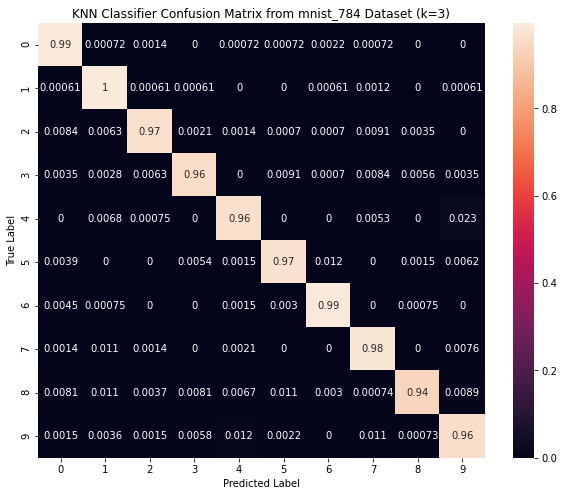

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

test_data_predictions = knn.predict(X_test)

confusion_mat = confusion_matrix(y_test, test_data_predictions, normalize='true')

plt.figure(figsize = (10,8))
sns.heatmap(confusion_mat, annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('KNN Classifier Confusion Matrix from mnist_784 Dataset (k=3)')

print(f'Accuracy = {100 * (round(accuracy_score(y_test, test_data_predictions),4))}%')


The model had an overall accuracy of the model was 97.22% which is surprisingly accurate.  The classified label accuracy was lowest for the 8 digit (94%), then 3, 4, and 9 (96%).

c) For K ranging from 1 to 20:
1. train a KNN on the training data - **3 points**
2. record the training and testing accuracy - **3 points**

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.  **- 5 points**

In [6]:
def multi_knn(xtrain, ytrain, xtest, ytest, k_range):
    """x corresponds to data, while y corresponds to true labels of data"""
    accuracy_results = []

    for i in range(1,(k_range+1)):        
        knn_model = KNeighborsClassifier(n_neighbors=i)

        knn_model.fit(xtrain, ytrain.ravel())

        accuracy_results.append(knn_model.score(xtest, ytest))

    return(accuracy_results)

In [7]:
range_20_knn = multi_knn(X_train,y_train,X_test,y_test,20)
# trainA, testA = multi_knn(X_train,y_train,X_test,y_test,1)
print()

Text(0.5, 1.0, 'KNN Classifier Accuracy for Various k from mnist_784 Dataset')

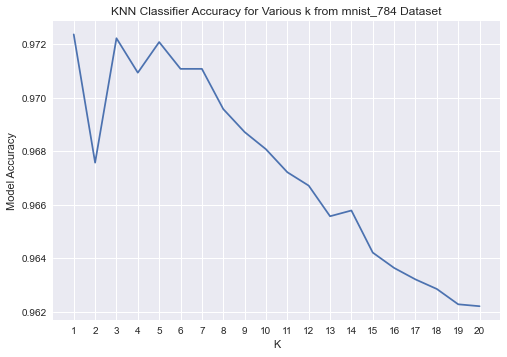

In [8]:
plt.style.use('seaborn')
plt.xticks(range(1,(20+1)))
plt.plot(range(1,(20+1)),range_20_knn)
plt.xlabel('K')
plt.ylabel('Model Accuracy')
plt.title('KNN Classifier Accuracy for Various k from mnist_784 Dataset')

According to this plot the optimal value of K is equal to k=1 (0.972357), however this may lead to overfitting. A similar level of accuracy is found at k=5 (0.972071) and suggests a "more" optimal value of k.

d) Using the optimal model found in c), plot the confusion matrix and discuss. - **5 points**

C:\Users\ryany\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<function matplotlib.pyplot.show(close=None, block=None)>

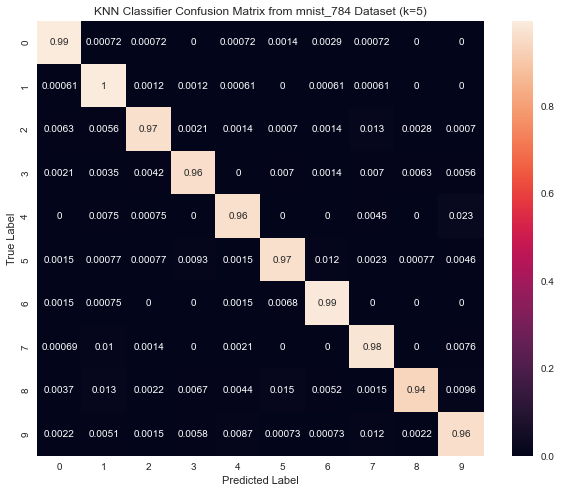

In [10]:
def optimal_k_confusion_mat(xtrain, ytrain, xtest, ytest, k):
    """x corresponds to data, while y corresponds to true labels of data"""
            
    knn_model = KNeighborsClassifier(n_neighbors=k)

    knn_model.fit(xtrain, ytrain)

    test_predictions = knn_model.predict(xtest)

    conf_matrix = confusion_matrix(ytest, test_predictions, normalize='true')

    plt.figure(figsize = (10,8))
    sns.heatmap(conf_matrix, annot=True)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('KNN Classifier Confusion Matrix from mnist_784 Dataset (k=5)')

    return(plt.show)

optimal_k_confusion_mat(X_train,y_train,X_test,y_test,5)

The confusion matrix suggests a highly accurate model.  Again it appears the 1 digit was classified with the most accuracy and the 8 digit, the least accurate. Using k=5 instead of k=3 produces nearly identical confusion matrix results.

e) Using the entire dataset (training + testing set): Use k-fold cross validation (with k=10) to evaluate the perfomance of your KNN model. By varying K from 1 to 20 as in c), determine the optimal number of neighbors for your KNN model based on the mean cv accuracy. Plot a graph of the training and testing set accuracy (use the mean cv accuracy) as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Discuss similarities or differences with results in c). **- 10 points**

In [11]:
from sklearn.model_selection import cross_val_score

def knn_cross_validated(x, y, kfold, k_range):
    cv_scores_total = []

    for i in range(1,(k_range+1)):
        knn_model = KNeighborsClassifier(n_neighbors=i)

        cv_scores = cross_val_score(knn_model, x, y.ravel(), cv=kfold)

        cv_scores_total.append(cv_scores.mean())

    return(cv_scores_total)


In [12]:
cv_k_range_20 = knn_cross_validated(X, y, 10, 20)

Text(0.5, 1.0, 'Cross-validated KNN Classifier Accuracy for Various k from mnist_784 Dataset')

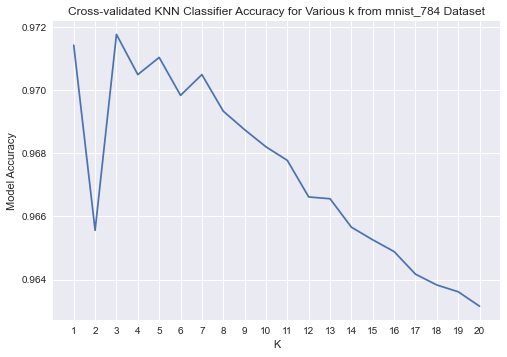

In [14]:
plt.xticks(range(1,(20+1)))
plt.plot(range(1,(20+1)),cv_k_range_20)
plt.xlabel('K')
plt.ylabel('Model Accuracy')
plt.title('Cross-validated KNN Classifier Accuracy for Various k from mnist_784 Dataset')

After running cross validation it appears that k=3 is optimal. Overall we recieved a very similar plot, yet with values a bit lower, as expected by running cross-validation 10 times per k.

f) Using the best model from d), pick an image at random and plot it next to its k nearest neighbors. **- 7 points**

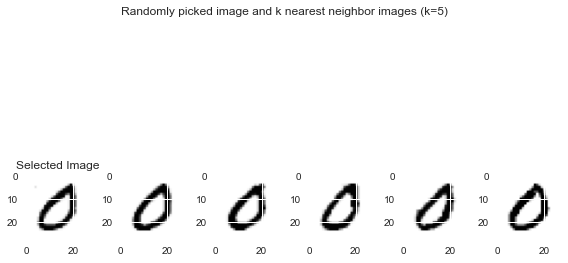

In [19]:
k_f = 5 #optimal found to be k = 5

# create knn and fit
knn_model_f = KNeighborsClassifier(n_neighbors=k_f)

knn_model_f.fit(X_train, y_train.ravel())

# predicted_label = knn_model_f.predict(X_test[rand_int].reshape(1, -1))

# select random image
rand_int = np.random.randint(0,13999)

random_image = X_test[rand_int].reshape(28, 28)

# find kneighbors for selected image
k_neigh = knn_model_f.kneighbors(X_test[rand_int].reshape(1, -1), k_f, return_distance=False)

# plot of randomly selected image and it's k nearest neighbor images
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6)
fig.suptitle('Randomly picked image and k nearest neighbor images (k=5)')
ax1.imshow(random_image)
ax1.set_title('Selected Image')
ax2.imshow(X_train[k_neigh[0][0]].reshape(28,28))
ax3.imshow(X_train[k_neigh[0][1]].reshape(28,28))
ax4.imshow(X_train[k_neigh[0][2]].reshape(28,28))
ax5.imshow(X_train[k_neigh[0][3]].reshape(28,28))
ax6.imshow(X_train[k_neigh[0][4]].reshape(28,28))
fig.tight_layout()

g) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat e) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension. **- 7 points**

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

def pca_knn_pipeline(x, y, kfold, k_range):
    cv_scores_total = []

    for i in range(1,(k_range+1)):
        pca_model = PCA(n_components = 0.98)

        knn_model = KNeighborsClassifier(n_neighbors=i)

        model = make_pipeline(pca_model, knn_model)

        # model.fit(x, y)

        cv_scores = cross_val_score(model, x, y.ravel(), cv=kfold)

        cv_scores_total.append(cv_scores.mean())

    return(cv_scores_total)

In [21]:
dim_reduced_cross_validated = pca_knn_pipeline(X, y, 10, 20)

Text(0.5, 1.0, 'Cross-validated KNN Classifier Accuracy for Various k from mnist_784 Dataset')

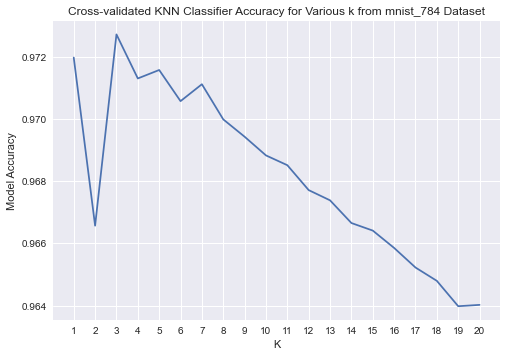

In [22]:
plt.xticks(range(1,(20+1)))
plt.plot(range(1,(20+1)),dim_reduced_cross_validated)
plt.xlabel('K')
plt.ylabel('Model Accuracy')
plt.title('Cross-validated KNN Classifier Accuracy for Various k from mnist_784 Dataset')

This model appears to have a slightly higher accuracy than e).  I would suspect this is due to reducing noise found in the image, that are not useful for classification, while also reducing the dimensionality.  I choose the parameter 0.98 to capture 98% of the variance captured in the dataset.  I wanted to preserve the accuracy of the model, while also reducing noise and dimensionality, which I believe I accomplished.

## Exercise 2 (50 points)

This exercise will re-use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data) from homework 1. Download all files this time.

a) Informed by homework 1, handle the missing values in the datasets. Briefly explain. **-5 points**

In [23]:
def read_df(fpath):
    return(pd.read_csv(fpath))

titanic_df = read_df('train.csv')

# drop columns that are not relevant and have missing values 
titanic_df = titanic_df.drop('Cabin', axis=1)
titanic_df = titanic_df.drop('Embarked', axis=1)

# impute missing age data with mean
titanic_df['Age'].fillna((titanic_df['Age'].mean()), inplace=True)

Cabin, Embarked, and Age were the only columns with missing values.  While embarked had 2 missing values, I do not believe this is a relevant factor in survival analysis.  Cabin had many missing values and imputing values did not seem feasible.  Finally for age I imputed the mean mean age into the missing values as a reasonable imputation for age.

b) Informed by homework 1, add 2 new features / columns to the datasets that you think might be related to the survival of individuals. Explain. **-5 points**

In [24]:
def title_extract(df):
    """Extracts the title from the name column of dataframe"""
    df_copy = df.copy(deep=True)

    df_copy['Title'] = df_copy['Name']
    title_col = df_copy['Title']
    title_regex = title_col.str.extract(r'(,*.[a-zA-Z]+\.)', expand=True)
    df_copy['Title'] = title_regex[0].str[2:]
    df_copy['Title'] = df_copy['Title'].str[:-1]

    return(df_copy['Title'])

def fare_normalization(df):
    """Subtracts mean from Fare column and divides by standard deviation of Fare column of df."""
    return (df["Fare"] - df["Fare"].mean())/df["Fare"].std()

titanic_df['Title'] = title_extract(titanic_df)

titanic_df.at[759,'Title'] = 'Mrs' #cleans up a stubborn data entry

titanic_df['Standard Fare'] = fare_normalization(titanic_df)

The Title in the exploratory analysis from homework one seemed to indicate differing survival rates, so this was added.  I also added a standardized fare to normalize the fare data, which will likely improve the survival analysis model.

c) Train a Decision Tree Classifier using all features you think may be related to survival (justify any that you remove). Set the `max_depth` parameter to an appropriate quantity to reduce the runtime and avoid overfitting. Explain. **- 10 points**

In [25]:
titanic_df = titanic_df.drop('PassengerId', axis=1)
titanic_df = titanic_df.drop('Fare', axis=1)
titanic_df = titanic_df.drop('Ticket', axis=1)
titanic_df = titanic_df.drop('Name', axis=1)

These four features were dropped as they are unlikely related to survival. ID, ticket and name are all identifiers rather than characteristics of the the individual, thus are unlikely to classify well in a model.  Fare was removed, as I previously added the normalized fare.

In [240]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

X2_df = titanic_df.loc[ : , titanic_df.columns != 'Survived']
y2_df = titanic_df['Survived'] #survived: 0 = No, 1 = Yes

#non-ordinal data, apply one-hot-encoding to categorical features
categorical_cols = ['Sex', 'Title']

one_hot_encoder = preprocessing.OneHotEncoder(sparse=False)

encoder_vars_arr = one_hot_encoder.fit_transform(X2_df[categorical_cols])

encoder_feature_names = one_hot_encoder.get_feature_names(categorical_cols)

encoder_vars_df = pd.DataFrame(encoder_vars_arr, columns = encoder_feature_names)

# data now hot encoded for input to Decistion Tree Classifier
X2_dfhot = pd.concat([X2_df.reset_index(drop = True), encoder_vars_df.reset_index(drop = True)], axis = 1)
X2_dfhot = X2_dfhot.drop(categorical_cols, axis=1)

feature_names = X2_dfhot.columns
labels = ['0', '1']

X2 = X2_dfhot.to_numpy()
y2 = y2_df.to_numpy().reshape(891,1) #survived: 0 = No, 1 = Yes

# split data for testing
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=1)

# Fit Decision Tree
DTree = DecisionTreeClassifier(max_depth = 3, random_state = 1)
DTree.fit(X2_train, y2_train)

I choose the max_depth to equal 3 as a conservative approach to not overfit (and speed runtime).  Based on the performance, I believe this parameter is a good choice as it relatively low to avoid overfitting. 

d) Plot the decision tree. Briefly explains how it works. **- 5 points**

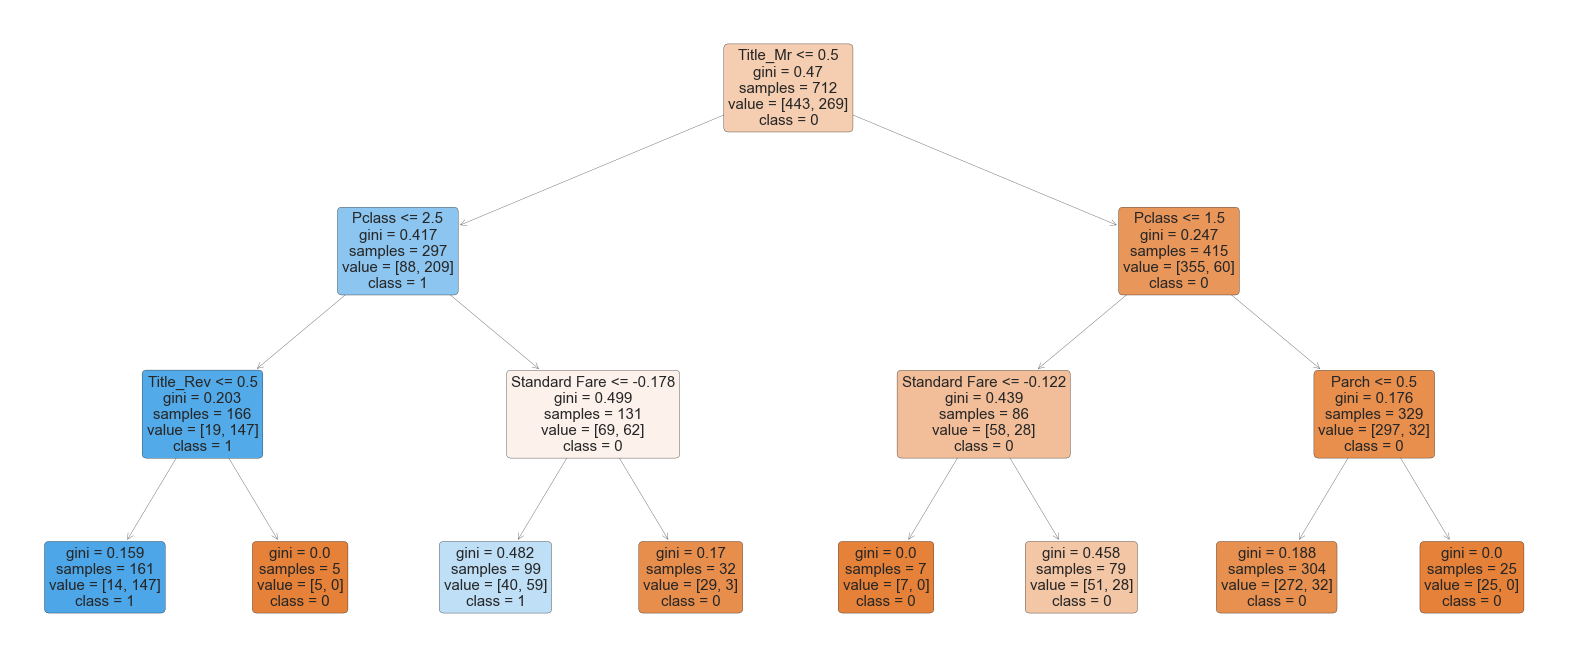

In [211]:
from sklearn.tree import plot_tree

plt.figure(figsize=(28,12))

d_tree = plot_tree(DTree, feature_names = feature_names,class_names = labels, filled = True, rounded = True, fontsize=15)

plt.show()

The first split was based on whether the title was Mr. (1 = Mr.).  Then each branch was split depending on the ticket class (pclass 1 = 1st, 2 = 2nd, 3 = 3rd) and so on down the tree.

e) Evaluate the classifier on the test set by plotting the confusion matrix. Comment on the pitfalls of the model (to help: For the examples that were misclassified, choose two at random and walk through the decision tree with their attributes and try to understand why the misclassification occured). **- 10 points**

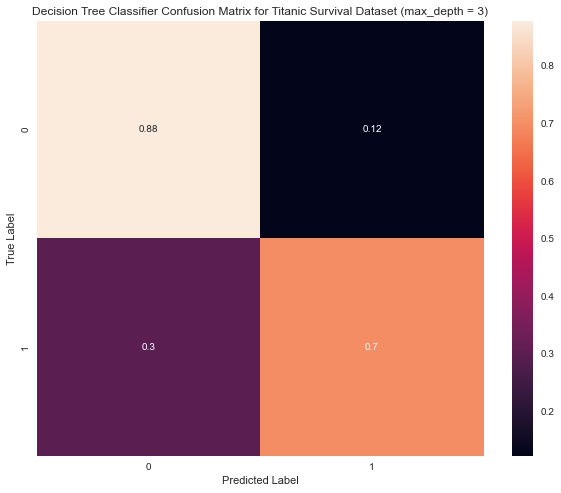

Accuracy = 0.804


In [196]:
test_predictions_dtree = DTree.predict(X2_test)

confusion_matrix_dtree = confusion_matrix(y2_test, test_predictions_dtree, normalize='true')
# confusion_matrix_dtree = confusion_matrix(y2_test, test_predictions_dtree)

plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix_dtree, annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Decision Tree Classifier Confusion Matrix for Titanic Survival Dataset (max_depth = 3)')
plt.show()

print(f'Accuracy = {round(accuracy_score(y2_test, test_predictions_dtree),3)}')

The model performed poorly on the label 1, looking at the decision tree plot it appears that there few leaf nodes leading to the classification of 1 and many instances are funneled towards a 0 classification in the tree.

f) Tune the parameters of the decision tree to improve its performance. Explain what you tried and what you observed. **- 5 points**

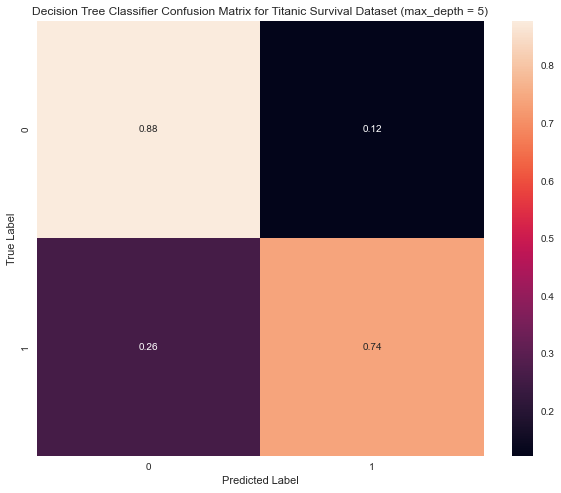

Accuracy = 0.821


In [197]:
DTree_tuned = DecisionTreeClassifier(max_depth = 5, random_state = 1)
DTree_tuned.fit(X2_train, y2_train)

test_predictions_dtree_tuned = DTree_tuned.predict(X2_test)

confusion_matrix_dtree_tuned = confusion_matrix(y2_test, test_predictions_dtree_tuned, normalize='true')
# confusion_matrix_dtree_tuned = confusion_matrix(y2_test, test_predictions_dtree)

plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix_dtree_tuned, annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Decision Tree Classifier Confusion Matrix for Titanic Survival Dataset (max_depth = 5)')
plt.show()

print(f'Accuracy = {round(accuracy_score(y2_test, test_predictions_dtree_tuned),3)}')

To start I changed the maximum depth. Changing to 4 I saw a bump in performance, and again repeating with 5.  Going 6 or higher decreased the performance greatly (I assume due to overfitting).  Next I tried tuneing the min_samples_leaf and criterion="entropy", but it appeared default was best or similar.  Although I was only able to make a single change, I received a modest improvement in performance.

g) Reduce the dimension of the dataset to 5 before creating a Decision Tree Classifier. Evaluate this classifier by plotting the confusion matrix. Comment on performance differences you observe. How interpretable is this model? Explain. **- 10 points**

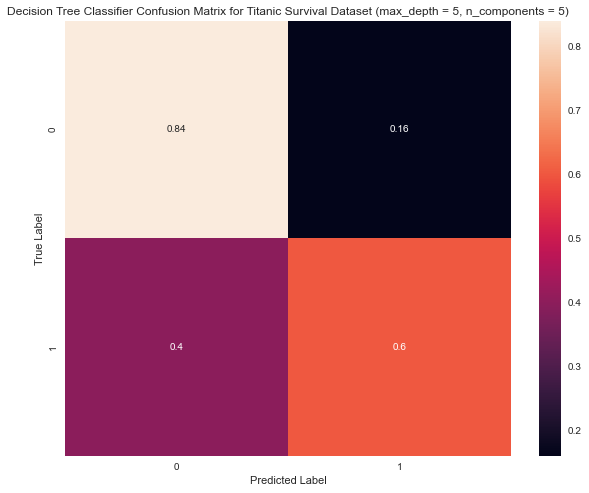

Accuracy = 0.743


In [206]:
# Create model
pca_model_g = PCA(n_components = 5)

DTree_tuned_g = DecisionTreeClassifier(max_depth = 5, random_state = 1)

model_pca_Dtree = make_pipeline(pca_model_g, DTree_tuned_g)

model_pca_Dtree.fit(X2_train, y2_train)

# Evaluate classifier
test_predictions_pca_Dtree = model_pca_Dtree.predict(X2_test)

confusion_matrix_pca_Dtree = confusion_matrix(y2_test, test_predictions_pca_Dtree, normalize='true')
# confusion_matrix_dtree_tuned = confusion_matrix(y2_test, test_predictions_dtree)

plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix_pca_Dtree, annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Decision Tree Classifier Confusion Matrix for Titanic Survival Dataset (max_depth = 5, n_components = 5)')
plt.show()

print(f'Accuracy = {round(accuracy_score(y2_test, test_predictions_pca_Dtree),3)}')

In this instance the performance decreased substantially.  Even if I was to see an increase in performance, the interpretability is lost when applying pca utilizing the principal components. One cannot easily trace the decision tree plot to find how an instance was classified. A strength of the decision tree is the ease in which to interpret the resulting tree, losing this should be avoided if possible.

# Bonus (40 Points)

## Random Forests
 Random Forest algorithm is an extension to the decision trees. We make use of multiple decision trees to make a decsion(classification/regression) in Random Forests.

Ensemble modelling is a method of constructing a strong model using several weak models. Random Forests algorithm is one such ensemble model

Multiple small decision trees trained on random parts of the training data collectively make a decision on an input point. The number of trees in this Random Forest algorithm is a hyper-parameter that you need to finetune to get the best output from this model. 

Every time you construct a tree, you pick random samples of size 'k'(k samples) from the total dataset and construct the tree. Make sure your tree depth is not very high, or the individual tree could overfit to the data. We want the collective model to generalize well to multiple datasets. 

During classification, we consider the decision of the majority of trees to be the final decision. 

- In this task, you are supposed to construct a random forests algorithm on the 'Titanic' dataset making use of your decision trees from **1c** and get the classification outputs. 
 
 

**Note**: Your are not supposed to use random forests model from sklearn or any other library, but however, you can use those libraries to construct multiple decision trees 

You can use any other library for your convenience, unless you are not trying to load a Random forest model from those libraries. 

### Construct your model (10 points)

In [325]:
from sklearn import tree
from numpy import random

# Here is suggested template for you to use
# But feel free to do something different
class Random_Forest():

    def __init__(self, num_trees, max_depth, criterion):
        self.max_depth = max_depth
        self.criterion = criterion
        self.decision_trees = [tree.DecisionTreeClassifier(criterion=criterion, max_depth=max_depth) for _ in range(num_trees)]
    
    def _sample(self, X, y):
        sample_n = X.shape[0]
        idch = np.random.choice(sample_n, sample_n, replace=True)
        return(X[idch], y[idch])

    def _fit_tree(self, X, y, idx):
        self.decision_trees[idx].fit(X, y)

    def fit(self, X, y):
        for idx in range(len(self.decision_trees)):
            X_sample, y_sample = self._sample(X, y)
            self._fit_tree(X_sample, y_sample, idx)
    
    def _majority(self, predictions):
        predicted = []

        for i in range(len(self.decision_trees)):
            predicted.append(self.decision_trees[i].predict(predictions))

        majority_label = np.zeros(predicted[0].shape)
             
        zero_count = 0
        one_count = 0 
        
        for i in range(len(predicted[0])):            
                for j in range(len(predicted)):
                    if predicted[j][i] == 0:
                        zero_count += 1
                    else:
                        one_count += 1

                values = zero_count, one_count
                majority_label[i] = values.index(max(values))
                zero_count = 0
                one_count = 0
        
        return(majority_label)
    
    def predict(self, X_test):
        return self._majority(X_test)


RF = Random_Forest(num_trees=100, max_depth=3, criterion='gini')
RF.fit(X2_train, y2_train)
rf_test_data_predictions = RF.predict(X2_test)

Accuracy = 0.804


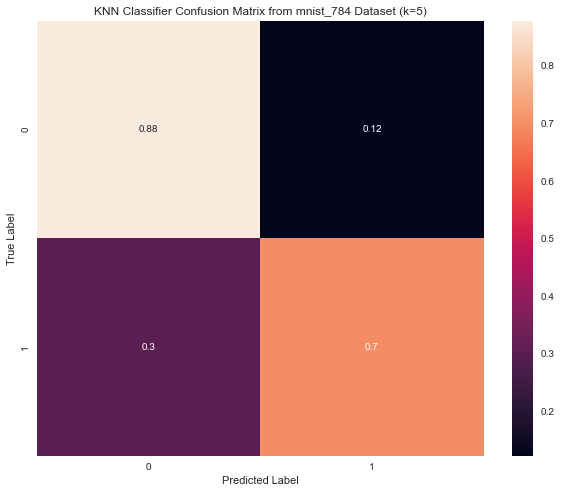

In [326]:
confusion_mat_rf = confusion_matrix(y2_test, rf_test_data_predictions, normalize='true')

plt.figure(figsize = (10,8))
sns.heatmap(confusion_mat_rf, annot=True)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('KNN Classifier Confusion Matrix from mnist_784 Dataset (k=5)')

plt.show

print(f'Accuracy = {round(accuracy_score(y2_test, rf_test_data_predictions),3)}')

### Hyperparameter tuning, and model evaluation for random forests. (25 points)

In order to avoid the cases of overfitting, we apply something called 'pruning' to the decision trees in this algorithm. Pruning is a method to cut the trees beyond a certain depth. This introduces ambiguity and randomness to the output, while increasing the generalization capability. 

 - Experiment with tree sizes(tree depth) of depth = 5,10,15
 - Experiment with different number of trees [10,50,100,500,1000] and report accuracies
 - Experiment with different information criteria ['gini index', 'entropy'] 


Report the accuracy of your best model, and compare it with your accuracy of the decision tree from **1c**. Write your observations on Random Forests algorithm

In [328]:
# Experiment with tree sizes(tree depth) of depth = 5,10,15
RF1 = Random_Forest(num_trees=10, max_depth=5, criterion='gini')
RF1.fit(X2_train, y2_train)
rf1_test_data_predictions = RF1.predict(X2_test)
print(f'Depth of 5 Accuracy = {round(accuracy_score(y2_test, rf1_test_data_predictions),3)}')

RF2 = Random_Forest(num_trees=10, max_depth=10, criterion='gini')
RF2.fit(X2_train, y2_train)
rf2_test_data_predictions = RF2.predict(X2_test)
print(f'Depth of 10 Accuracy = {round(accuracy_score(y2_test, rf2_test_data_predictions),3)}')

RF3 = Random_Forest(num_trees=10, max_depth=15, criterion='gini')
RF3.fit(X2_train, y2_train)
rf3_test_data_predictions = RF3.predict(X2_test)
print(f'Depth of 15 Accuracy = {round(accuracy_score(y2_test, rf3_test_data_predictions),3)}')

# Experiment with different number of trees [10,50,100,500,1000] and report accuracies
RF4 = Random_Forest(num_trees=10, max_depth=5, criterion='gini')
RF4.fit(X2_train, y2_train)
rf4_test_data_predictions = RF4.predict(X2_test)
print(f'10 Trees Accuracy = {round(accuracy_score(y2_test, rf4_test_data_predictions),3)}')

RF5 = Random_Forest(num_trees=50, max_depth=5, criterion='gini')
RF5.fit(X2_train, y2_train)
rf5_test_data_predictions = RF5.predict(X2_test)
print(f'50 Trees Accuracy = {round(accuracy_score(y2_test, rf5_test_data_predictions),3)}')

RF6 = Random_Forest(num_trees=100, max_depth=5, criterion='gini')
RF6.fit(X2_train, y2_train)
rf6_test_data_predictions = RF6.predict(X2_test)
print(f'100 Trees Accuracy = {round(accuracy_score(y2_test, rf6_test_data_predictions),3)}')

RF7 = Random_Forest(num_trees=500, max_depth=5, criterion='gini')
RF7.fit(X2_train, y2_train)
rf7_test_data_predictions = RF7.predict(X2_test)
print(f'500 Trees Accuracy = {round(accuracy_score(y2_test, rf7_test_data_predictions),3)}')

RF8 = Random_Forest(num_trees=1000, max_depth=5, criterion='gini')
RF8.fit(X2_train, y2_train)
rf8_test_data_predictions = RF8.predict(X2_test)
print(f'1000 Trees Accuracy = {round(accuracy_score(y2_test, rf8_test_data_predictions),3)}')

# Experiment with different information criteria ['gini index', 'entropy']
RF9 = Random_Forest(num_trees=10, max_depth=5, criterion='gini')
RF9.fit(X2_train, y2_train)
rf9_test_data_predictions = RF9.predict(X2_test)
print(f'Gini Accuracy = {round(accuracy_score(y2_test, rf9_test_data_predictions),3)}')

RF10 = Random_Forest(num_trees=10, max_depth=5, criterion='entropy')
RF10.fit(X2_train, y2_train)
rf10_test_data_predictions = RF10.predict(X2_test)
print(f'Entropy Accuracy = {round(accuracy_score(y2_test, rf10_test_data_predictions),3)}')

Depth of 5 Accuracy = 0.799
Depth of 10 Accuracy = 0.782
Depth of 15 Accuracy = 0.782
10 Trees Accuracy = 0.793
50 Trees Accuracy = 0.816
100 Trees Accuracy = 0.804
500 Trees Accuracy = 0.799
1000 Trees Accuracy = 0.799
Gini Accuracy = 0.804
Entropy Accuracy = 0.804


The accuracy of my 2C decision tree had an accuracy = 0.804.  It appears that my best performing random forest model improved in accuracy with 50 Trees at an accuracy = 0.816.  There is a slight improvement, but not nearly as much as I would hope. I believe that I may have hit a wall with my dataset, I'm questioning whether I removed too many features or if the dataset is fundamentally hard to predict with the given features.

### Calculations (5 points)

$$ \text{Information gain} = \text{(Entropy of Parent Node)} - \sum_{c}{\text{(entropy of child node)} }$$

$$Entropy = \sum_{i=1}^{C} -p_{i}log(p_{i})$$
$$p_{i} = \frac{C_{i}}{ \sum_{j=1}^{C} C_{j}}$$
$$C_{i} = \text{Count of elements belonging to class 'i'}$$
$$C = \text{Total Number of Elements}$$

We have total data of 50,000 samples

- We randomly sampled about 5000 samples and trained a decision tree. 
- We are trying to classify the samples at a node for one of the tree 'T'
- Parent Node has 34 samples, out of which 15 are positive, and 19 are negative 
- We divided the node based on a particular column, and now we have two child nodes
- Child 1 has 13 samples, of which 9 are positive and 4 are negative
- Child 2 has 21 samples, of which 6 are positive and 15 are negative,

Calculate the information gain for splitting the parent note based on that column

**Note:** You can attach a handwritten image for this part or write your answer in the markdown cell below. 
